# DATA 422 Group Project
## Weather Data Wrangling
### Samuel Love - 84107034

The goal of this notebook is to wrangle weather data into a usefull format that can be combined with the groups other datasets.

The resulting dataframe will display average readings of [rainfall](https://www.stats.govt.nz/indicators/rainfall/), [temperature](https://www.stats.govt.nz/indicators/temperature),  and [windspeed](https://www.stats.govt.nz/indicators/extreme-wind/) measurements from the 16 regions of New Zealand for the years 2014, 2015, 2016, and 2017.

The data sourced from [StatsNZ](https://www.stats.govt.nz/) which in turn sourced from NIWA.

In [1]:
# Libraries
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(visdat) # for visualising missingness

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
# Importing the raw data
Raw_Rain <- read_csv(file = "Raw_Rain.csv")
Raw_Temp <- read_csv(file = "Raw_Temp.csv")
Raw_Wind <- read_csv(file = "Raw_Wind.csv")

Rows: 8970 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): season, site, reference_period
dbl  (5): agent_number, precipitation, lat, lon, anomaly
date (2): period_start, period_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 27894 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): statistic, season, site, reference_period
dbl  (7): agent_number, year, prop_missing, temperature, lat, lon, anomaly
date (2): period_start, period_end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51840 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): site, statistic
dbl (6): mon

In [3]:
# Glimpsing
Raw_Rain %>% glimpse()
Raw_Temp %>% glimpse()
Raw_Wind %>% glimpse()

Rows: 8,970
Columns: 10
$ agent_number     <dbl> 1056, 1287, 1400, 15752, 1615, 1770, 1858, 1962, 2112…
$ season           <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Sp…
$ precipitation    <dbl> 326.6, 308.2, 210.7, 212.4, 225.6, 219.0, 158.0, 234.…
$ period_start     <date> 2019-09-01, 2019-09-01, 2019-09-01, 2019-09-01, 2019…
$ period_end       <date> 2019-11-30, 2019-11-30, 2019-11-30, 2019-11-30, 2019…
$ lat              <dbl> -35.18300, -35.76900, -36.60600, -45.90129, -37.67300…
$ lon              <dbl> 173.9260, 174.3640, 174.8350, 170.5147, 176.1960, 176…
$ site             <chr> "Kerikeri", "Whangarei", "Whangaparaoa", "Dunedin", "…
$ anomaly          <dbl> -42.476667, -11.120000, -49.110000, 58.930000, -69.21…
$ reference_period <chr> "1961-1990", "1961-1990", "1961-1990", "1961-1990", "…
Rows: 27,894
Columns: 13
$ agent_number     <dbl> 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056, 1056,…
$ statistic        <chr> "Average", "Average", "Average", "Average", "M

In [4]:
# Seperating the date format in Rain data to get a year column
Raw_Rain %<>% separate(period_end, sep = "-", into = c("year", "month", "day"))

In [5]:
Raw_Wind %>% head()

site,statistic,month,year,agent_number,data_value,lat,lon
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Auckland,Average,1,1972,1962,NA,-37.00813,174.7887
Auckland,Average,1,1973,1962,NA,-37.00813,174.7887
Auckland,Average,1,1974,1962,NA,-37.00813,174.7887
Auckland,Average,1,1975,1962,NA,-37.00813,174.7887
Auckland,Average,1,1976,1962,NA,-37.00813,174.7887
Auckland,Average,1,1977,1962,NA,-37.00813,174.7887


In [6]:
# Selecting the relevant rows from the raw data
Rain <- Raw_Rain[c("year", "season", "precipitation", "site")]
Temp <- Raw_Temp[c("year", "season", "temperature", "statistic", "site")]
Wind <- Raw_Wind[c("year", "statistic", "data_value", "site")]

In [7]:
# Glimpsing
Rain %>% glimpse()
Temp %>% glimpse()
Wind %>% glimpse()

Rows: 8,970
Columns: 4
$ year          <chr> "2019", "2019", "2019", "2019", "2019", "2019", "2019", …
$ season        <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Sprin…
$ precipitation <dbl> 326.6, 308.2, 210.7, 212.4, 225.6, 219.0, 158.0, 234.4, …
$ site          <chr> "Kerikeri", "Whangarei", "Whangaparaoa", "Dunedin", "Tau…
Rows: 27,894
Columns: 5
$ year        <dbl> 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019…
$ season      <chr> "Autumn", "Spring", "Summer", "Winter", "Autumn", "Spring"…
$ temperature <dbl> 16.800000, 14.933333, 20.100000, 12.366667, 22.033333, 20.…
$ statistic   <chr> "Average", "Average", "Average", "Average", "Maximum", "Ma…
$ site        <chr> "Kerikeri", "Kerikeri", "Kerikeri", "Kerikeri", "Kerikeri"…
Rows: 51,840
Columns: 4
$ year       <dbl> 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,…
$ statistic  <chr> "Average", "Average", "Average", "Average", "Average", "Ave…
$ data_value <dbl> NA, NA, NA, NA, NA, NA, NA, NA

In [8]:
# Trimming the data to the relevent years
Rain %<>% subset(year == 2014 | year == 2015 | year == 2016 | year == 2017)
Temp %<>% subset(year == 2014 | year == 2015 | year == 2016 | year == 2017)
Wind %<>% subset(year == 2014 | year == 2015 | year == 2016 | year == 2017)

Rows: 600
Columns: 4
$ year          <chr> "2017", "2017", "2017", "2017", "2017", "2017", "2017", …
$ season        <chr> "Spring", "Spring", "Spring", "Spring", "Spring", "Sprin…
$ precipitation <dbl> 287.9, 254.4, 192.8, 119.0, 395.6, 278.4, 235.2, 196.8, …
$ site          <chr> "Kerikeri", "Whangarei", "Whangaparaoa", "Dunedin", "Tau…


Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.”


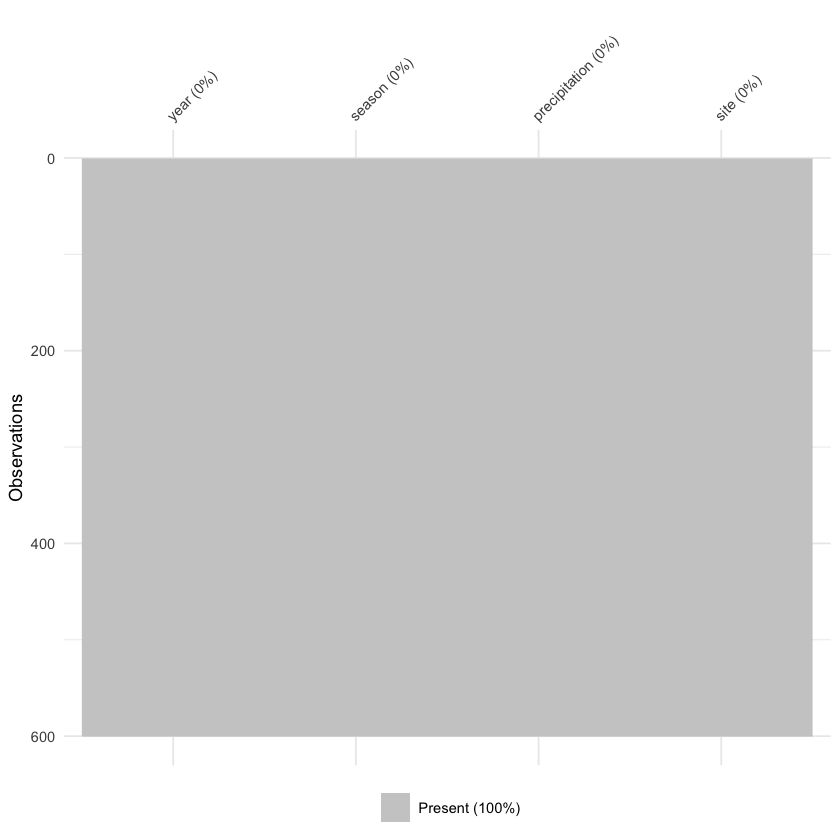

In [9]:
# Glimpsing and checking missingness
Rain %>% glimpse()
Rain %>% vis_miss()
# There is no missingness in the Rain data

Rows: 1,800
Columns: 5
$ year        <dbl> 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017…
$ season      <chr> "Autumn", "Spring", "Summer", "Winter", "Autumn", "Spring"…
$ temperature <dbl> 17.233333, 14.633333, 19.233333, 12.133333, 21.900000, 19.…
$ statistic   <chr> "Average", "Average", "Average", "Average", "Maximum", "Ma…
$ site        <chr> "Kerikeri", "Kerikeri", "Kerikeri", "Kerikeri", "Kerikeri"…


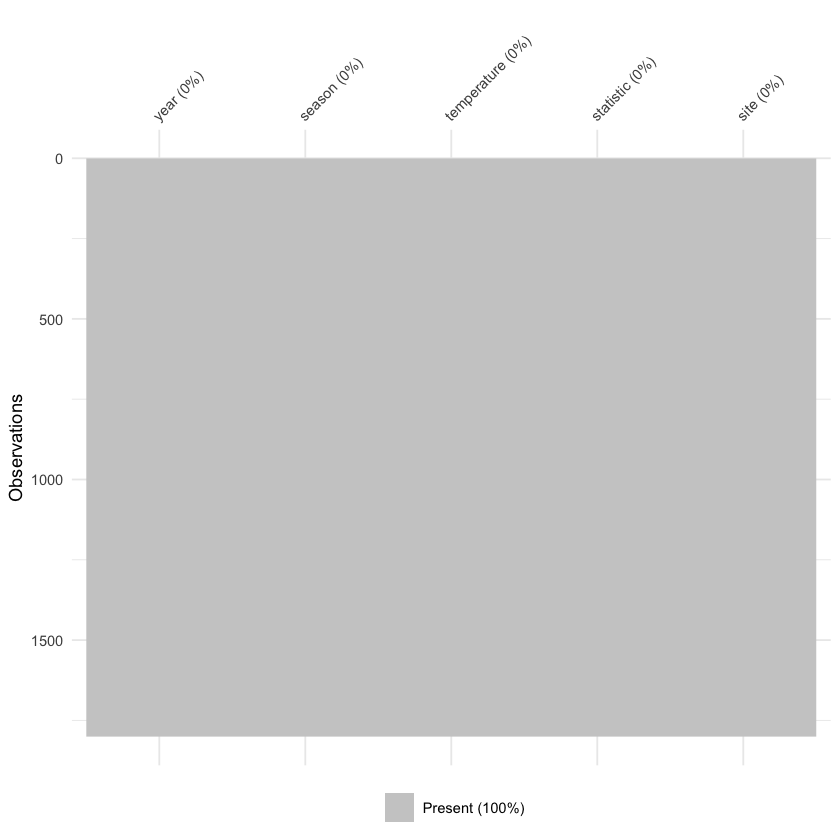

In [10]:
# Glimpsing and checking missingness
Temp %>% glimpse()
Temp %>% vis_miss()
# There is no missingness in the Temp data

Rows: 4,320
Columns: 4
$ year       <dbl> 2014, 2015, 2016, 2017, 2014, 2015, 2016, 2017, 2014, 2015,…
$ statistic  <chr> "Average", "Average", "Average", "Average", "Average", "Ave…
$ data_value <dbl> 47.2, 35.6, 39.8, 47.7, 39.8, 37.3, 39.7, 36.3, 37.5, 39.6,…
$ site       <chr> "Auckland", "Auckland", "Auckland", "Auckland", "Auckland",…


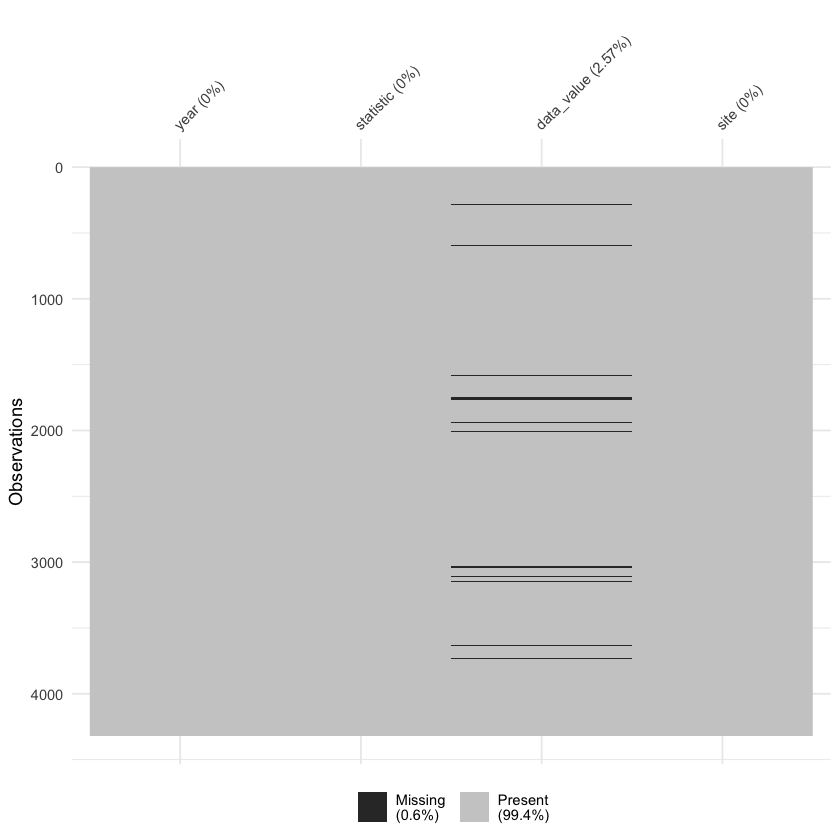

In [11]:
# Glimpsing and checking missingness
Wind %>% glimpse()
Wind %>% vis_miss()
# There is 2.5% missingness in the Wind data which is an acceptable threshold for our purposes.
# Needs cleaning when aggregating.

In [12]:
# Trimming the data to the relevent statistic.
Rain %<>% subset(season == "Annual")
Temp %<>% subset(season == "Annual")
Wind %<>% subset(statistic == "Average")

In [13]:
# Trimming the Wind data to remove NA's
Wind %<>% subset(data_value != "")

In [14]:
# Obtaining one average data reading for each year.
Rain_ag <- aggregate(Rain$precipitation, by = list(Rain$year, Rain$site), FUN = "mean")
Temp_ag <- aggregate(Temp$temperature, by = list(Temp$year, Temp$site), FUN = "mean")
Wind_ag <- aggregate(Wind$data_value, by = list(Wind$year, Wind$site), FUN = "mean")

In [15]:
# Extracting the sites data
Rain_sites <- Rain$site %>% unique()
Temp_sites <- Temp$site %>% unique()
Wind_sites <- Wind$site %>% unique()

In [16]:
# Making a sites dataframe
Sites_df <- tibble(Rain = Rain_sites[order(names(setNames(Rain_sites, Rain_sites)))],
                   Temp = Temp_sites[order(names(setNames(Temp_sites, Temp_sites)))],
                   Wind = Wind_sites[order(names(setNames(Wind_sites, Wind_sites)))])
Sites_df
# They are all the same list so only need to check one for the Regions

Rain,Temp,Wind
<chr>,<chr>,<chr>
Auckland,Auckland,Auckland
Blenheim,Blenheim,Blenheim
Christchurch,Christchurch,Christchurch
Dannevirke,Dannevirke,Dannevirke
Dunedin,Dunedin,Dunedin
Gisborne,Gisborne,Gisborne
Gore,Gore,Gore
Hamilton,Hamilton,Hamilton
Hokitika,Hokitika,Hokitika


In [17]:
# Making a general list of sites and saving it as a csv
Sites_df <- data.frame(Sites = Wind_sites)
Sites_df %>% write_csv("Sites_df.csv")

In [18]:
# Importing the appended sites dataframe from the regions notebook
Sites_df_v2 = read_csv("Sites_df_v2.csv")
Sites_df_v2

Rows: 30 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Sites, Regions

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sites,Regions
<chr>,<chr>
Auckland,Auckland
Blenheim,Marlborough
Christchurch,Canterbury
Dannevirke,Manawatū-Whanganui
Dunedin,Otago
Gisborne,Gisborne
Gore,Southland
Hamilton,Waikato
Hokitika,West Coast


In [19]:
# Merging to get Regions
Rain_ag %<>% rename("Sites" = "Group.2")
Rain_ag %<>% merge(Sites_df_v2, "Sites")
Temp_ag %<>% rename("Sites" = "Group.2")
Temp_ag %<>% merge(Sites_df_v2, "Sites")
Wind_ag %<>% rename("Sites" = "Group.2")
Wind_ag %<>% merge(Sites_df_v2, "Sites")

In [20]:
# Aggregating over Region
Rain_ag_v2 <- aggregate(Rain_ag$x, by = list(Rain_ag$Group.1, Rain_ag$Regions), FUN = "mean")
Temp_ag_v2 <- aggregate(Temp_ag$x, by = list(Temp_ag$Group.1, Temp_ag$Regions), FUN = "mean")
Wind_ag_v2 <- aggregate(Wind_ag$x, by = list(Wind_ag$Group.1, Wind_ag$Regions), FUN = "mean")

In [21]:
# Updating column names
colnames(Rain_ag_v2) <- c("Year", "Region", "Average_Precipitation_mm")
colnames(Temp_ag_v2) <- c("Year", "Region", "Average_Temperature_°C")
colnames(Wind_ag_v2) <- c("Year", "Region", "Average_Windgusts_kn")

In [22]:
# Glimpsing
Rain_ag_v2 %>% glimpse()
Temp_ag_v2 %>% glimpse()
Wind_ag_v2 %>% glimpse()

Rows: 60
Columns: 3
$ Year                     <chr> "2014", "2015", "2016", "2017", "2014", "2015…
$ Region                   <chr> "Auckland", "Auckland", "Auckland", "Auckland…
$ Average_Precipitation_mm <dbl> 1017.9000, 942.6500, 1164.7000, 1306.3000, 10…
Rows: 60
Columns: 3
$ Year                     <dbl> 2014, 2015, 2016, 2017, 2014, 2015, 2016, 201…
$ Region                   <chr> "Auckland", "Auckland", "Auckland", "Auckland…
$ `Average_Temperature_°C` <dbl> 15.65833, 15.87083, 16.44444, 16.26111, 14.11…
Rows: 60
Columns: 3
$ Year                 <dbl> 2014, 2015, 2016, 2017, 2014, 2015, 2016, 2017, 2…
$ Region               <chr> "Auckland", "Auckland", "Auckland", "Auckland", "…
$ Average_Windgusts_kn <dbl> 47.24167, 44.16250, 46.27083, 43.81250, 39.75833,…


In [23]:
# Rounding average readings to 2dp
Rain_ag_v2 %<>% format(digits = 5)
Temp_ag_v2 %<>% format(digits = 4)
Wind_ag_v2 %<>% format(digits = 4)

In [24]:
# Joining the dataframes
Weather <- merge(Rain_ag_v2, Temp_ag_v2, c("Year", "Region"))
Weather %<>% merge(Wind_ag_v2, c("Year", "Region"))

In [25]:
# Final Dataframe
Weather

Year,Region,Average_Precipitation_mm,Average_Temperature_°C,Average_Windgusts_kn
<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
2014,Auckland,1017.90,15.66,47.24
2014,Bay of Plenty,1098.80,14.11,39.76
2014,Canterbury,575.23,10.30,40.03
2014,Gisborne,1096.00,14.67,38.12
2014,Hawke's Bay,625.20,14.68,42.32
2014,Manawatū-Whanganui,953.30,12.38,40.28
2014,Marlborough,591.80,12.80,40.88
2014,Nelson,861.40,13.26,37.61
2014,Northland,1744.80,15.86,39.04


In [26]:
# Saving the Final dataframe as a csv
Weather %>% write_csv("Weather_data.csv")